<a href="https://colab.research.google.com/github/isaacmenchaca97/EfficientNetB0/blob/main/medical_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Digital Image Processing for General Image Classification: Final Project
###Isaac Menchaca Panecatl
###Dr. Ulises Moya
###Computer Science Master's
**Based on paper**: [EfficientNet: Rethinking Model Scaling for Convolutional Neural Networks](https://arxiv.org/abs/1905.11946)  (2019), by Mingxing Tan and Quoc V. Le, introduces an innovative approach to scaling convolutional neural networks (CNNs) efficiently and effectively.

**Objective**: To develop an image classification system using the pre-trained EfficientNet-B0 model, evaluating the impact of various digital image processing techniques (blur, noise, and contrast) on the model's performance when classifying 100 general images from a selected dataset.

**Methodology**:


1.   Data Preparation: Select 100 images from a general-purpose dataset.
Perform dimensionality preprocessing to standardize the input size for the EfficientNet-B0 model.
2.   Baseline Classification: Use the pre-trained EfficientNet-B0 model to classify the original images and record metrics such as accuracy, precision, and recall.
1.   Testing with Image Processing:
  - Blur: Apply a blur filter (Gaussian Blur) to the images and perform classification using EfficientNet-B0.
  - Noise: Add random noise (salt-and-pepper) to the images and repeat the classification.
  - Contrast: Enhance image contrast using techniques such as histogram adjustment or CLAHE (Contrast Limited Adaptive Histogram Equalization), then classify the images.
2.   Results Analysis: Compare classification metrics across original and processed images.
Evaluate how each image processing technique influences the model's performance.
1.   Conclusions: Identify which image modifications positively or negatively affect classification accuracy.


**Link to video**:

##1. Data Preparation

In [13]:
#!/usr/bin/env python
## -*- coding: utf-8 -*-
__author__ = ["Isaac Menchaca Panecatl"]
__copyright__ = "Copyright 2024"
__credits__ = ["Isaac Menchaca Panecatl"]
__license__ = "MIT"
__version__ = "0.0.1"
__maintainer__ = ["Isaac Menchaca Panecatl"]
__email__ = "isaac.menchaca@edu.uag.mx"
__status__ = "Development"

import torch
from torchvision.models import efficientnet_b0
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from PIL import Image
import json
import urllib.request
from torch import nn

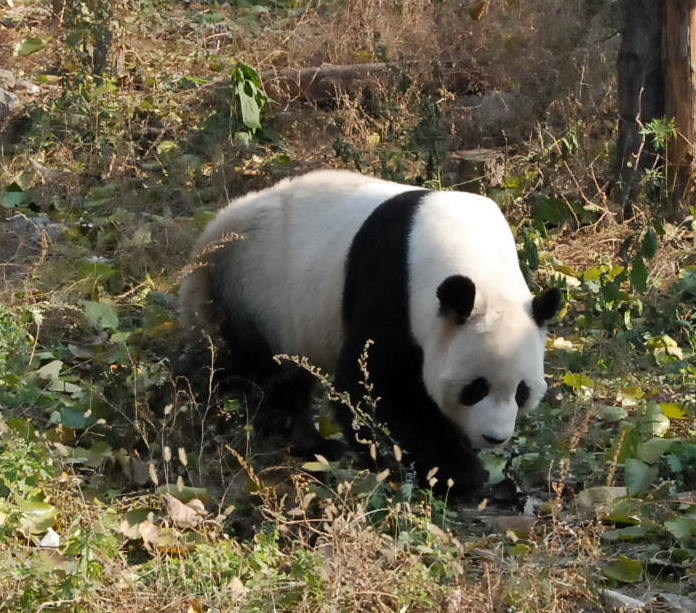

In [19]:
# Transformaciones necesarias
preprocess = transforms.Compose([
    transforms.Resize(256),                # Escalar el lado más pequeño a 256 píxeles
    transforms.CenterCrop(224),            # Recortar el centro a 224x224
    transforms.ToTensor(),                 # Convertir a tensor
    transforms.Normalize(                  # Normalizar con medias y desviaciones estándar de ImageNet
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])

# Cargar una imagen
image = Image.open("img.jpg").convert("RGB")
input_tensor = preprocess(image).unsqueeze(0)  # Añadir dimensión batch
image

##2. Baseline Classification

In [15]:
# Cargar el modelo preentrenado
model = efficientnet_b0(pretrained=True)

# Cambiar a modo de evaluación (inferencia)
model.eval()

EfficientNet(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): MBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
            (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
          (1): SqueezeExcitation(
            (avgpool): AdaptiveAvgPool2d(output_size=1)
            (fc1): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
            (fc2): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
            (activation): SiLU(inplace=True)
            (scale_activation): Sigmoid()
          )
          (2): Conv2dNormActivat

In [16]:
# Desactivar gradientes para inferencia más rápida
with torch.no_grad():
    output = model(input_tensor)

# Convertir salidas a probabilidades con softmax
probabilities = torch.nn.functional.softmax(output[0], dim=0)

In [17]:
url = "https://raw.githubusercontent.com/anishathalye/imagenet-simple-labels/master/imagenet-simple-labels.json"
response = urllib.request.urlopen(url)
labels = json.load(response)

# Mostrar la clase más probable
top1_idx = probabilities.argmax().item()
print(f"Predicción: {labels[top1_idx]} (Confianza: {probabilities[top1_idx]:.2f})")

Predicción: giant panda (Confianza: 0.92)
